In [1]:
#First We are going to preprocess the data then on this data we will makw Random forest model
#After Building Random Forest model we are going to do Hyperparameter tuning
#Note Duration is taken into minutes and null values and some outliers have been replaced with appropriate values

## Handeling Categorical Data
#### 1)Nominal Data (name data)-> OneHotEncoder 
#### 2)Ordinal Data (ordered data) some kind of rating-> Label Encoder

In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [168]:
train_data = pd.read_csv('train_data.csv')
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Arr_Time_Min,Arr_Time_Hour,Dep_Time_Hour,Dep_Time_Min,Day_of_Journey,Month_of_Journey
0,Jet Airways,Kolkata,Banglore,1335,1,In-flight meal not included,10844,15,18.0,20,0,18,5
1,Jet Airways,Banglore,New Delhi,365,1,In-flight meal not included,22270,45,0.0,18,40,9,3
2,Air India,Kolkata,Banglore,1700,2,No check-in baggage included,15532,45,13.0,9,25,15,5
3,Multiple carriers,Delhi,Cochin,495,2,In-flight meal not included,11966,20,21.0,13,5,3,3
4,Jet Airways,Kolkata,Banglore,395,1,In-flight meal not included,12384,35,23.0,17,0,1,5


In [169]:
train_data['Source'].unique()

array(['Kolkata', 'Banglore', 'Delhi', 'Mumbai', 'Chennai'], dtype=object)

In [170]:
train_data.drop('Additional_Info',axis=1,inplace=True)

In [171]:
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Arr_Time_Min,Arr_Time_Hour,Dep_Time_Hour,Dep_Time_Min,Day_of_Journey,Month_of_Journey
0,Jet Airways,Kolkata,Banglore,1335,1,10844,15,18.0,20,0,18,5
1,Jet Airways,Banglore,New Delhi,365,1,22270,45,0.0,18,40,9,3
2,Air India,Kolkata,Banglore,1700,2,15532,45,13.0,9,25,15,5
3,Multiple carriers,Delhi,Cochin,495,2,11966,20,21.0,13,5,3,3
4,Jet Airways,Kolkata,Banglore,395,1,12384,35,23.0,17,0,1,5


In [172]:
train_data['Airline'].value_counts()

Jet Airways                          3093
IndiGo                               1666
Air India                            1403
Multiple carriers                     944
SpiceJet                              646
Vistara                               377
Air Asia                              247
GoAir                                 157
Multiple carriers Premium economy       7
Jet Airways Business                    4
Vistara Premium economy                 1
Name: Airline, dtype: int64

In [173]:
train_data.groupby('Month_of_Journey').count()

,Airline,Source,Destination,Duration,Total_Stops,Price,Arr_Time_Min,Arr_Time_Hour,Dep_Time_Hour,Dep_Time_Min,Day_of_Journey
Month_of_Journey,,,,,,,,,,,
3,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156
4,860,860,860,860,860,860,860,860,860,860,860
5,2790,2790,2790,2790,2790,2790,2790,2790,2790,2790,2790
6,2739,2739,2739,2739,2739,2739,2739,2739,2739,2739,2739


In [174]:
#Airline is a Nominal Categorical data so we will perform OneHotEncoding
Airline = train_data[['Airline']]
Airline = pd.get_dummies(Airline)
Airline.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0


In [176]:
#Similarly for Source and destination we have Nominal categorical Data therefor we will perform OneHotEncoding

Sources = train_data[['Source']]
print(train_data['Source'].unique())
# Sources['Source'].unique()
Sources = pd.get_dummies(Sources)
Sources.head()



['Kolkata' 'Banglore' 'Delhi' 'Mumbai' 'Chennai']


,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,1,0
1,1,0,0,0,0
2,0,0,0,1,0
3,0,0,1,0,0
4,0,0,0,1,0


In [177]:
Destination = train_data[['Destination']]
Destination = pd.get_dummies(Destination)
Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [178]:
data_train = pd.concat([train_data,Airline,Sources,Destination],axis =1)


In [179]:
data_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Arr_Time_Min,Arr_Time_Hour,Dep_Time_Hour,Dep_Time_Min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Kolkata,Banglore,1335,1,10844,15,18.0,20,0,...,0,0,1,0,1,0,0,0,0,0
1,Jet Airways,Banglore,New Delhi,365,1,22270,45,0.0,18,40,...,0,0,0,0,0,0,0,0,0,1
2,Air India,Kolkata,Banglore,1700,2,15532,45,13.0,9,25,...,0,0,1,0,1,0,0,0,0,0
3,Multiple carriers,Delhi,Cochin,495,2,11966,20,21.0,13,5,...,0,1,0,0,0,1,0,0,0,0
4,Jet Airways,Kolkata,Banglore,395,1,12384,35,23.0,17,0,...,0,0,1,0,1,0,0,0,0,0


In [180]:
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [181]:
data_train.head()

,Duration,Total_Stops,Price,Arr_Time_Min,Arr_Time_Hour,Dep_Time_Hour,Dep_Time_Min,Day_of_Journey,Month_of_Journey,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1335,1,10844,15,18.0,20,0,18,5,0,...,0,0,1,0,1,0,0,0,0,0
1,365,1,22270,45,0.0,18,40,9,3,0,...,0,0,0,0,0,0,0,0,0,1
2,1700,2,15532,45,13.0,9,25,15,5,0,...,0,0,1,0,1,0,0,0,0,0
3,495,2,11966,20,21.0,13,5,3,3,0,...,0,1,0,0,0,1,0,0,0,0
4,395,1,12384,35,23.0,17,0,1,5,0,...,0,0,1,0,1,0,0,0,0,0


In [182]:
data_train.shape

(8545, 31)

### for test we will do same

In [183]:
test_data = pd.read_csv('test_data.csv')
test_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Arr_Time_Min,Arr_Time_Hour,Dep_Time_Hour,Dep_Time_Min,Day_of_Journey,Month_of_Journey
0,Jet Airways,Banglore,New Delhi,405,1,In-flight meal not included,9134,25,18.0,11,40,15,3
1,Multiple carriers,Delhi,Cochin,710,1,In-flight meal not included,9486,55,0.0,13,5,21,5
2,Air India,Kolkata,Banglore,610,2,Change airports,10697,30,18.0,8,20,21,5
3,Air India,Delhi,Cochin,1600,2,In-flight meal not included,11806,40,7.0,5,0,21,5
4,Jet Airways,Kolkata,Banglore,450,1,In-flight meal not included,7594,40,4.0,21,10,12,6


In [184]:
test_data['Airline'].value_counts()

Jet Airways                          756
IndiGo                               387
Air India                            349
Multiple carriers                    252
SpiceJet                             172
Vistara                              102
Air Asia                              72
GoAir                                 37
Multiple carriers Premium economy      6
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [185]:
test_data.groupby('Month_of_Journey').count()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Arr_Time_Min,Arr_Time_Hour,Dep_Time_Hour,Dep_Time_Min,Day_of_Journey
Month_of_Journey,,,,,,,,,,,,
3,567,567,567,567,567,567,567,567,567,567,567,567
4,219,219,219,219,219,219,219,219,219,219,219,219
5,676,676,676,676,676,676,676,676,676,676,676,676
6,675,675,675,675,675,675,675,675,675,675,675,675


In [186]:
#Airline is a Nominal Categorical data so we will perform OneHotEncoding
Airline = test_data[['Airline']]
Airline = pd.get_dummies(Airline)

#Similarly for Source and destination we have Nominal categorical Data therefor we will perform OneHotEncoding
Sources = test_data[['Source']]
Sources = pd.get_dummies(Sources)

Destination = test_data[['Destination']]
Destination = pd.get_dummies(Destination)

data_test = pd.concat([test_data,Airline,Sources,Destination],axis =1)
data_test.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Arr_Time_Min,Arr_Time_Hour,Dep_Time_Hour,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Banglore,New Delhi,405,1,In-flight meal not included,9134,25,18.0,11,...,0,0,0,0,0,0,0,0,0,1
1,Multiple carriers,Delhi,Cochin,710,1,In-flight meal not included,9486,55,0.0,13,...,0,1,0,0,0,1,0,0,0,0
2,Air India,Kolkata,Banglore,610,2,Change airports,10697,30,18.0,8,...,0,0,1,0,1,0,0,0,0,0
3,Air India,Delhi,Cochin,1600,2,In-flight meal not included,11806,40,7.0,5,...,0,1,0,0,0,1,0,0,0,0
4,Jet Airways,Kolkata,Banglore,450,1,In-flight meal not included,7594,40,4.0,21,...,0,0,1,0,1,0,0,0,0,0


In [187]:
data_test.drop(['Airline','Source','Destination','Additional_Info'],axis=1,inplace=True)

In [188]:
data_test.head()

,Duration,Total_Stops,Price,Arr_Time_Min,Arr_Time_Hour,Dep_Time_Hour,Dep_Time_Min,Day_of_Journey,Month_of_Journey,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,405,1,9134,25,18.0,11,40,15,3,0,...,0,0,0,0,0,0,0,0,0,1
1,710,1,9486,55,0.0,13,5,21,5,0,...,0,1,0,0,0,1,0,0,0,0
2,610,2,10697,30,18.0,8,20,21,5,0,...,0,0,1,0,1,0,0,0,0,0
3,1600,2,11806,40,7.0,5,0,21,5,0,...,0,1,0,0,0,1,0,0,0,0
4,450,1,7594,40,4.0,21,10,12,6,0,...,0,0,1,0,1,0,0,0,0,0


In [189]:
data_train.head()

,Duration,Total_Stops,Price,Arr_Time_Min,Arr_Time_Hour,Dep_Time_Hour,Dep_Time_Min,Day_of_Journey,Month_of_Journey,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1335,1,10844,15,18.0,20,0,18,5,0,...,0,0,1,0,1,0,0,0,0,0
1,365,1,22270,45,0.0,18,40,9,3,0,...,0,0,0,0,0,0,0,0,0,1
2,1700,2,15532,45,13.0,9,25,15,5,0,...,0,0,1,0,1,0,0,0,0,0
3,495,2,11966,20,21.0,13,5,3,3,0,...,0,1,0,0,0,1,0,0,0,0
4,395,1,12384,35,23.0,17,0,1,5,0,...,0,0,1,0,1,0,0,0,0,0


In [190]:
list(set(data_train.columns)-set(data_test.columns))

[]

In [191]:
data_train[data_train['Airline_Multiple carriers Premium economy']==1]

,Duration,Total_Stops,Price,Arr_Time_Min,Arr_Time_Hour,Dep_Time_Hour,Dep_Time_Min,Day_of_Journey,Month_of_Journey,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
390,620,1,10161,15,19.0,8,55,21,3,0,...,0,1,0,0,0,1,0,0,0,0
1906,680,1,14629,50,18.0,7,30,21,3,0,...,0,1,0,0,0,1,0,0,0,0
4222,770,1,14629,50,18.0,6,0,21,3,0,...,0,1,0,0,0,1,0,0,0,0
5133,440,1,11269,20,13.0,6,0,21,3,0,...,0,1,0,0,0,1,0,0,0,0
5236,395,1,11269,30,15.0,8,55,21,3,0,...,0,1,0,0,0,1,0,0,0,0
5980,395,1,10885,35,1.0,19,0,21,3,0,...,0,1,0,0,0,1,0,0,0,0
7346,810,1,9845,0,21.0,7,30,21,3,0,...,0,1,0,0,0,1,0,0,0,0


## Feature Selection 
finding out the best feature which will contribute and have good relation with target varible 
Following are the some feature selectiion methods
#### 1.heatmap
#### 2.feature_importance_
#### 3.SelectKBest


In [192]:
data_train.columns

Index(['Duration', 'Total_Stops', 'Price', 'Arr_Time_Min', 'Arr_Time_Hour',
       'Dep_Time_Hour', 'Dep_Time_Min', 'Day_of_Journey', 'Month_of_Journey',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [193]:
X=data_train.loc[:,['Duration', 'Total_Stops', 'Arr_Time_Min', 'Arr_Time_Hour',
       'Dep_Time_Hour', 'Dep_Time_Min', 'Day_of_Journey', 'Month_of_Journey',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]
X.head()

,Duration,Total_Stops,Arr_Time_Min,Arr_Time_Hour,Dep_Time_Hour,Dep_Time_Min,Day_of_Journey,Month_of_Journey,Airline_Air Asia,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1335,1,15,18.0,20,0,18,5,0,0,...,0,0,1,0,1,0,0,0,0,0
1,365,1,45,0.0,18,40,9,3,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1700,2,45,13.0,9,25,15,5,0,1,...,0,0,1,0,1,0,0,0,0,0
3,495,2,20,21.0,13,5,3,3,0,0,...,0,1,0,0,0,1,0,0,0,0
4,395,1,35,23.0,17,0,1,5,0,0,...,0,0,1,0,1,0,0,0,0,0


In [194]:
y=data_train.loc[:,'Price']
y.head()

0    10844
1    22270
2    15532
3    11966
4    12384
Name: Price, dtype: int64

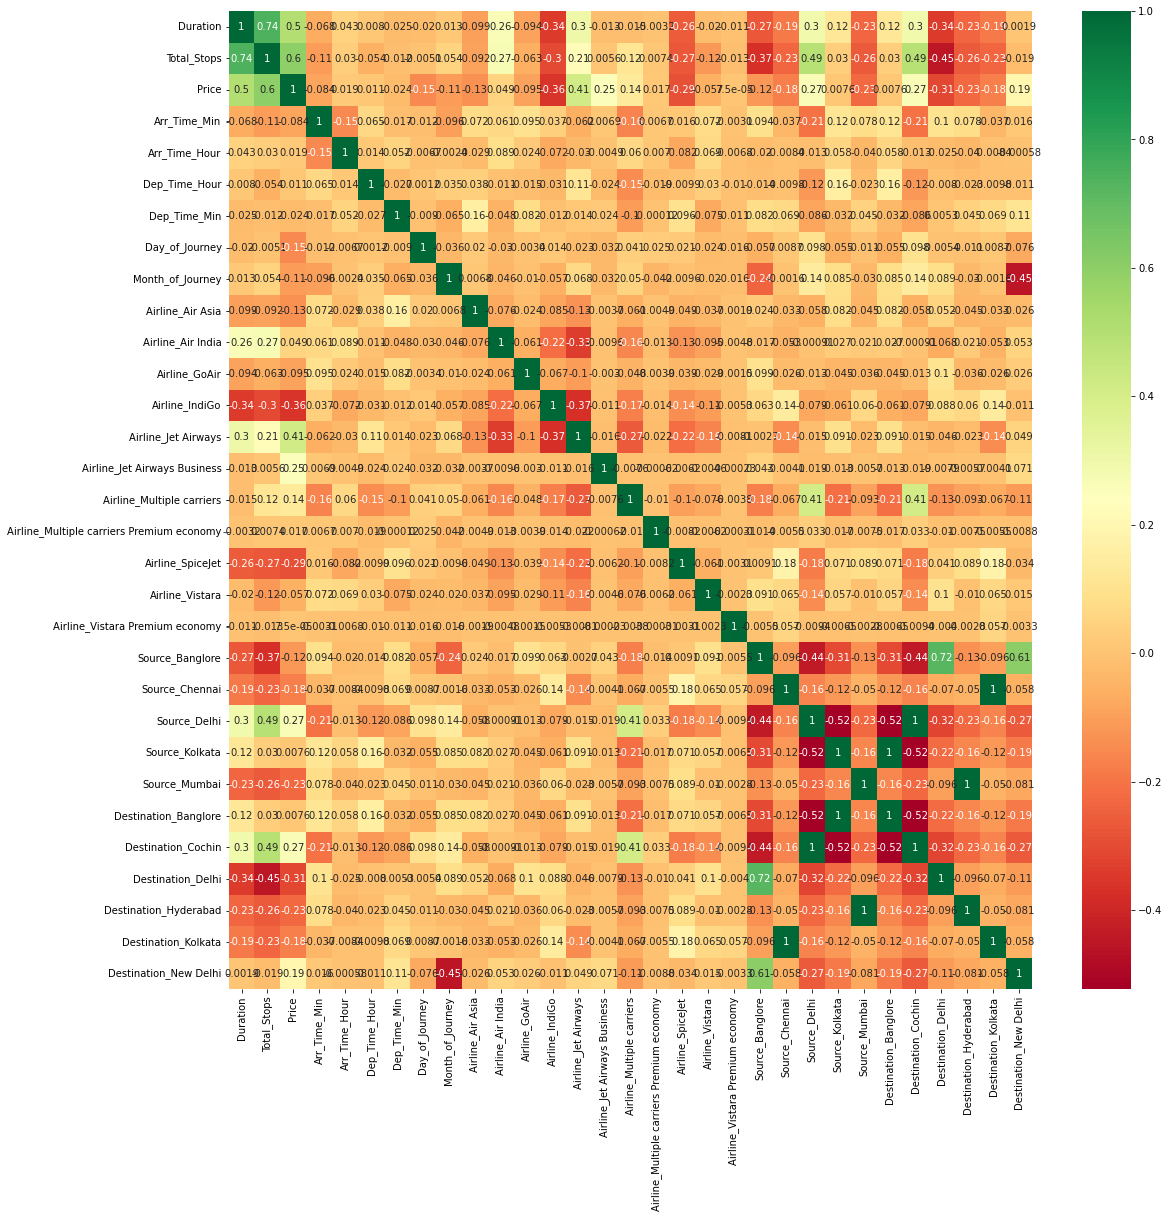

In [195]:
#finding correlation between Independent and dependent attributes
plt.figure(figsize=(18,18))
sns.heatmap(data_train.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [196]:
#visualizing Important features
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

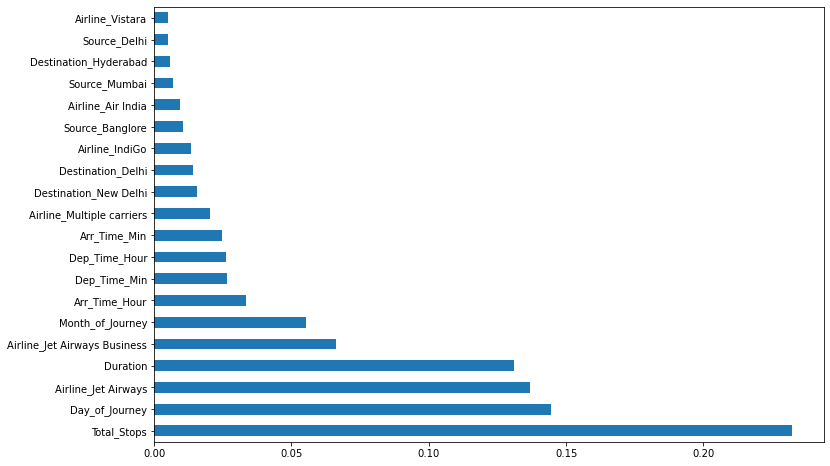

In [197]:
plt.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_,index = X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Fitting model Using Random Forest


In [202]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X,y)

RandomForestRegressor()

In [203]:
reg_rf.score(X,y)

0.9552588408391083

In [206]:
X_test=data_test.loc[:,['Duration', 'Total_Stops', 'Arr_Time_Min', 'Arr_Time_Hour',
       'Dep_Time_Hour', 'Dep_Time_Min', 'Day_of_Journey', 'Month_of_Journey',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]
y_test=data_test.loc[:,'Price']

In [207]:
y_pred=reg_rf.predict(X_test)
reg_rf.score(X_test,y_test)

0.8421952807781845

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


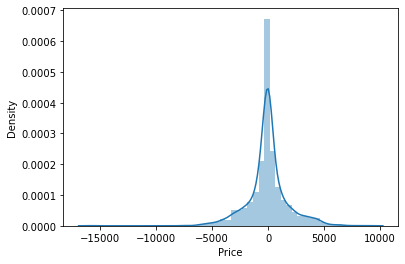

In [208]:
sns.distplot(y_test - y_pred)
plt.show()

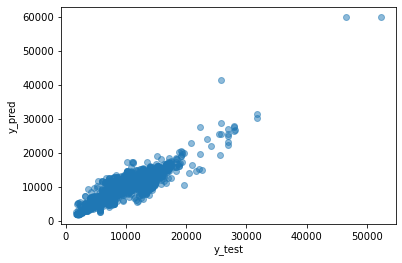

In [209]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [210]:
from sklearn import metrics
import numpy as np

In [211]:
print("MAE: ",metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE:  1149.8193084136656
MSE:  3300025.5100386445
RMSE:  1816.5972338519744


In [212]:
metrics.r2_score(y_test,y_pred)

0.8421952807781845

### Hyperparameter Tuning
1. RandomizedSearchCV it is Fast
2. GridSearchCV
#### Check best parameters and best score

In [213]:
from sklearn.model_selection import RandomizedSearchCV

In [214]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#Number of features to consider at every split
max_features = ['auto','sqrt']
#Maximum number of levels in tree 
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
#Minimum number of samples required split a node
min_samples_split = [2,5,10,15,100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [215]:
#Create the random grid
random_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

In [216]:
# Random search parameters, using 5 fold cross validation
# Search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf,param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [217]:
rf_random.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [218]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [219]:
prediction = rf_random.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


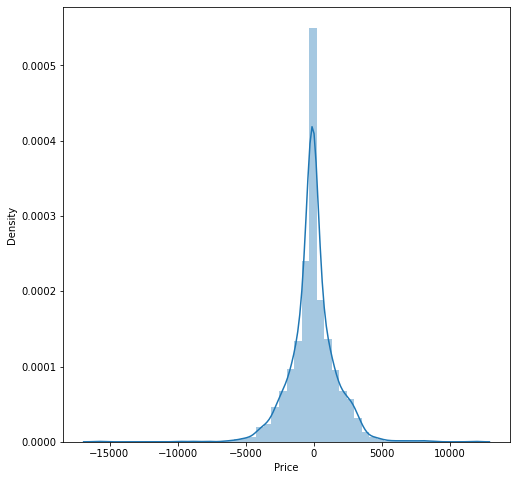

In [220]:
plt.figure(figsize=(8,8))
sns.distplot(y_test - prediction)
plt.show()

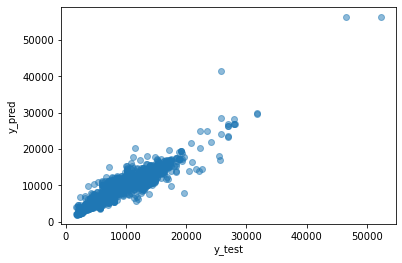

In [221]:
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [222]:
metrics.r2_score(y_test,prediction)

0.8634711763585595

In [223]:
print("MAE: ",metrics.mean_absolute_error(y_test,prediction))
print("MSE: ",metrics.mean_squared_error(y_test,prediction))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE:  1121.0133646295942
MSE:  2855102.199060441
RMSE:  1689.704766833674


In [224]:
##saving the model

In [225]:
import pickle
file = open('flight_rf_model.pkl','wb')
#dump imformation to that file
pickle.dump(rf_random,file)

In [226]:
model = open('flight_rf_model.pkl','rb')
forest = pickle.load(model)

In [227]:
y_prediction = forest.predict(X_test)

In [228]:
metrics.r2_score(y_test,y_prediction)

0.8634711763585595

In [229]:
import datetime

In [230]:
data_train.columns

Index(['Duration', 'Total_Stops', 'Price', 'Arr_Time_Min', 'Arr_Time_Hour',
       'Dep_Time_Hour', 'Dep_Time_Min', 'Day_of_Journey', 'Month_of_Journey',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [255]:
test={'Duration':800, 'Total_Stops':1, 'Arr_Time_Min':15, 'Arr_Time_Hour':20,
       'Dep_Time_Hour':6, 'Dep_Time_Min':10, 'Day_of_Journey':15, 'Month_of_Journey':6,
       'Airline_Air Asia':0, 'Airline_Air India':0, 'Airline_GoAir':0,
       'Airline_IndiGo':0, 'Airline_Jet Airways':1, 'Airline_Jet Airways Business':0,
       'Airline_Multiple carriers':0,
       'Airline_Multiple carriers Premium economy':0, 'Airline_SpiceJet':0,
       'Airline_Vistara':0, 'Airline_Vistara Premium economy':0, 'Source_Banglore':0,
       'Source_Chennai':0, 'Source_Delhi':1, 'Source_Kolkata':0, 'Source_Mumbai':0,
       'Destination_Banglore':1, 'Destination_Cochin':0, 'Destination_Delhi':0,
       'Destination_Hyderabad':0, 'Destination_Kolkata':0,
       'Destination_New Delhi':0}

In [262]:
test1=pd.DataFrame(test,columns=['Duration', 'Total_Stops', 'Arr_Time_Min', 'Arr_Time_Hour',
       'Dep_Time_Hour', 'Dep_Time_Min', 'Day_of_Journey', 'Month_of_Journey',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],index=[1])
# df = pd.DataFrame(test)
# print(df)

In [263]:
rf_random.predict(test1)

array([12264.96281262])

In [264]:
X.to_csv('X_train.csv',index=False)
y.to_csv('y_train.csv',index=False)
X_test.to_csv('X_test.csv',index=False)
y_test.to_csv('y_test.csv',index=False)